In [10]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
bathy = np.fromfile(os.path.join('bathymetry.bin'),'>f4').reshape([245,300])

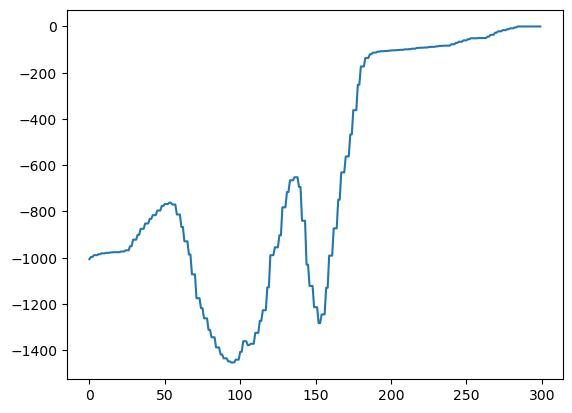

In [12]:
plt.plot(bathy[100,:])

In [13]:
# define a 5x5 gaussian kernel
kernel_size = 5
sigma = 1.0
ax = np.linspace(-(kernel_size - 1) / 2., (kernel_size - 1) / 2., kernel_size)
gauss_1d = np.exp(-0.5 * np.square(ax) / np.square(sigma))
kernel = np.outer(gauss_1d, gauss_1d)

smoothed_bathy = np.copy(bathy)
for i in range(2, bathy.shape[0]-2):
    for j in range(2, bathy.shape[1]-2):
        kernel_tmp = np.copy(kernel)
        if np.any(bathy[i-2:i+3,j-2:j+3]<0):
            kernel_tmp[bathy[i-2:i+3,j-2:j+3]>=0] = 0
            kernel_tmp = kernel_tmp / np.sum(kernel_tmp)
            smoothed_bathy[i,j] = np.sum(bathy[i-2:i+3,j-2:j+3]*kernel_tmp)

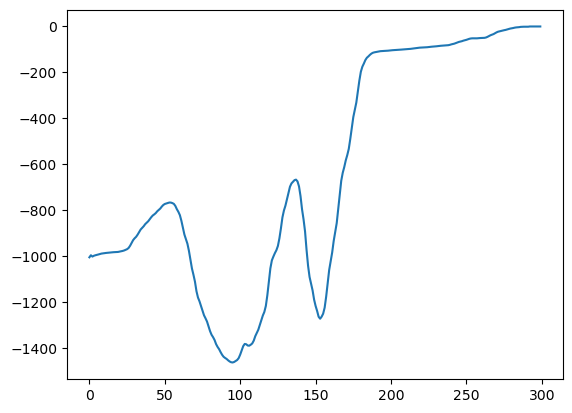

In [14]:
plt.plot(smoothed_bathy[100,:])

In [16]:
output_file = 'bathymetry.bin'
smoothed_bathy.ravel('C').astype('>f4').tofile(output_file)

In [19]:
new_bathy = np.fromfile(os.path.join('bathymetry.bin'),'>f4').reshape([245,300])

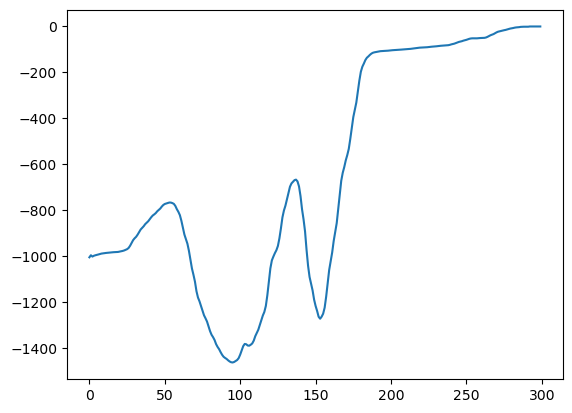

In [21]:
plt.plot(new_bathy[100,:])